# Lab | Imbalanced Data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
#getting data
path_name = 'files_for_lab/'
file_name = 'customer_churn.csv'
data = pd.read_csv(path_name+file_name)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploring Data

We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges. Looking at these more closely...

In [3]:
data = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']]
data.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes


In [4]:
#cleaning column names
data.rename(columns = {'SeniorCitizen':'senior_citizen',
                       'MonthlyCharges':'monthly_charges',
                       'Churn':'churn'}, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   7043 non-null   int64  
 1   tenure           7043 non-null   int64  
 2   monthly_charges  7043 non-null   float64
 3   churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


In [6]:
data.senior_citizen.unique()

array([0, 1])

### Nulls
- there are no nulls to deal with

### Variable types
- `senior_citizen` appears to be a categorical value, it should be changed to an object

In [7]:
data.senior_citizen = data.senior_citizen.astype(str)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   7043 non-null   object 
 1   tenure           7043 non-null   int64  
 2   monthly_charges  7043 non-null   float64
 3   churn            7043 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 220.2+ KB


### Checking count and distributions for variables

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

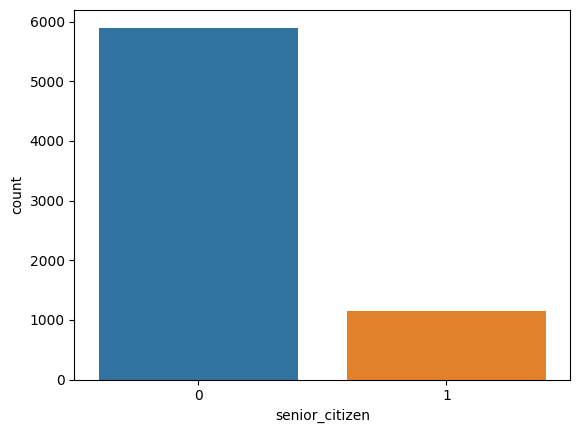

In [10]:
sns.countplot(x='senior_citizen', data=data);
plt.show()

`senior_citizen` is very unbalanced

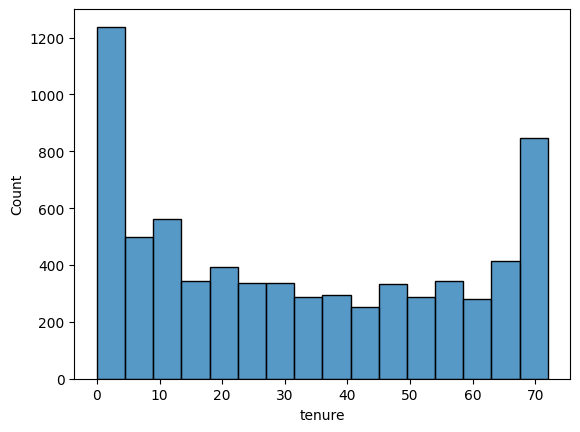

In [11]:
sns.histplot(x='tenure', data=data)
plt.show()

In [12]:
data.tenure.skew()

0.2395397495619829

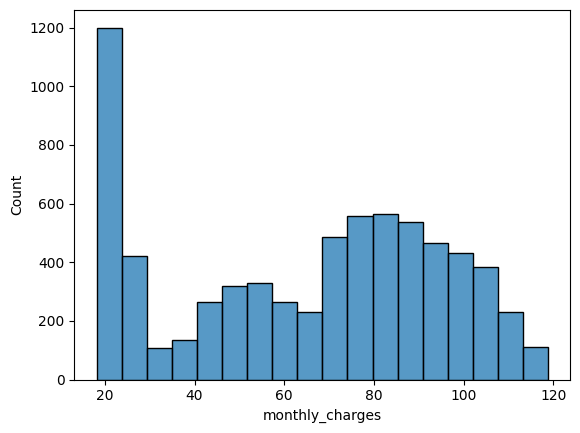

In [13]:
sns.histplot(x='monthly_charges', data=data)
plt.show()

In [14]:
data.monthly_charges.skew()

-0.22052443394398033

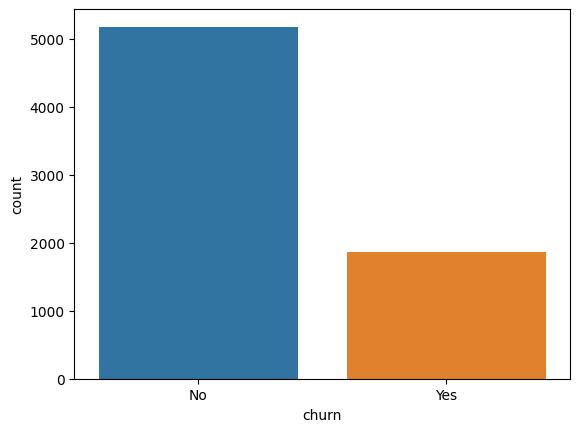

In [15]:
sns.countplot(x='churn', data=data);
plt.show()

In [16]:
data.describe()

,tenure,monthly_charges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


### Check for multicollinearity

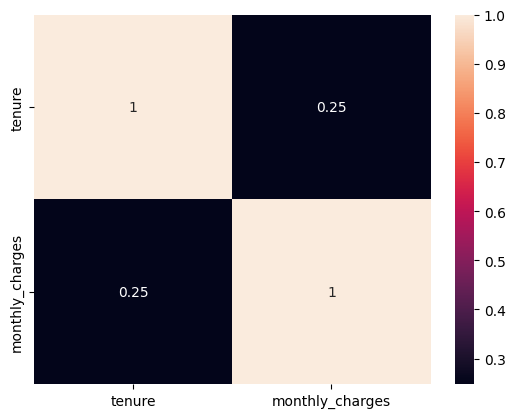

In [17]:
import numpy as np
nums = data.select_dtypes(include = np.number)
nums_matrix = nums.corr()
sns.heatmap(nums_matrix, annot=True)
plt.show()

The two numeric columns do not correlate with each other so it is ok to include them both.

### Split X,y

In [18]:
y = data['churn']
X = data.drop('churn', axis=1)

### Split Train, Test

In [19]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) # default test_size value is .2

### Apply transformations

#### Change the (categorical) values in y_train and y_test from `Yes`, `No`, to 1 and 0

In [20]:
y_train[:5]

6463     No
289     Yes
4356     No
6222     No
1790    Yes
Name: churn, dtype: object

In [21]:
#change y_train, y_test values from True/False to 1/0
dict = {'Yes':1, 'No':0}
def true_to_one(srs:pd.Series)->pd.Series:
    return srs.replace(dict, inplace=True)

In [22]:
true_to_one(y_train)

In [23]:
true_to_one(y_test)

#### Scale the numeric columns in X_train and X_test

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 6463 to 5157
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   5282 non-null   object 
 1   tenure           5282 non-null   int64  
 2   monthly_charges  5282 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.1+ KB


In [25]:
# split X_train, X_test into numeric and categorical datasets to scale the numeric columns

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)

X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')

In [26]:
#scale numeric columns - using MinMaxScaler because we have one categorical column in X

#fit
scaler = MinMaxScaler().fit(X_train_num)

#scale X_train_num
X_train_scaled_np = scaler.transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train_num.columns, index=X_train_num.index)


#scale X_test_num
X_test_scaled_np = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test_num.columns, index=X_test_num.index)

X_train_num_scaled.head()

,tenure,monthly_charges
6463,0.819444,0.506474
289,0.138889,0.264940
4356,0.041667,0.005478
6222,0.916667,0.708665
1790,0.166667,0.596116


In [27]:
#concat cat and num datasets

X_train_transformed = pd.concat([X_train_cat, X_train_num_scaled], axis=1)
X_test_transformed = pd.concat([X_test_cat, X_test_num_scaled], axis=1)

X_train_transformed.head()

,senior_citizen,tenure,monthly_charges
6463,0,0.819444,0.506474
289,0,0.138889,0.264940
4356,0,0.041667,0.005478
6222,0,0.916667,0.708665
1790,0,0.166667,0.596116


In [28]:
X_train_transformed.shape

(5282, 3)

In [29]:
X_test_transformed.shape

(1761, 3)

### Creating a Logistic Regression model

In [30]:
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

#fit
classification.fit(X_train_transformed, y_train)

#predict
y_train_pred = classification.predict(X_train_transformed)
y_test_pred = classification.predict(X_test_transformed)

### Evaluating the model

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))

The accuracy in the TEST set is: 0.80
The precision in the TEST set is: 0.61
The recall in the TEST set is: 0.47
The F1 in the TEST set is: 0.53
The Kappa in the TEST set is: 0.40


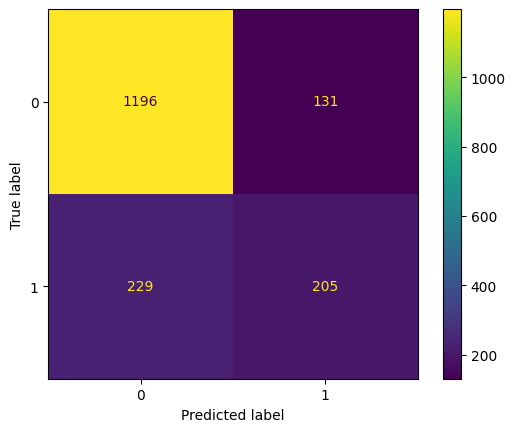

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classification.classes_)
disp.plot()
plt.show()

In [33]:
y_test_pred.shape

(1761,)

20% of the dataset was mislabeled. This is not unexpected since our dataset overrepresents `churn` = 'No'

### Sythetic Minority Oversampling Technique (SMOTE)
Applying SMOTE to the dataset, then will check whether there was any improvement in the model.

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE(random_state=100, k_neighbors=3) #tried k_neighbors=5 as well, didn't change anything

In [36]:
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)

In [37]:
print(X_train_transformed.shape)
print(X_train_SMOTE.shape)

(5282, 3)
(7694, 3)


In [38]:
y_train_SMOTE.value_counts()

churn
0    3847
1    3847
Name: count, dtype: int64

#### Train a new model with the SMOTE dataset

In [39]:
lr = LogisticRegression(max_iter=1000)

#fit
lr.fit(X_train_SMOTE, y_train_SMOTE)

#predict
y_test_pred = lr.predict(X_test_transformed)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))

The accuracy in the TEST set is: 0.74
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.74
The F1 in the TEST set is: 0.58
The Kappa in the TEST set is: 0.41


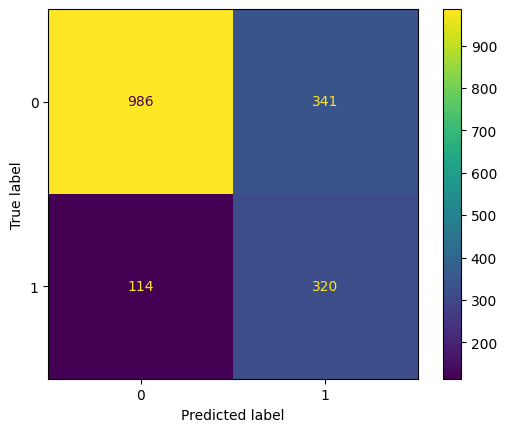

In [40]:
cm_test = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

#### First model
The accuracy in the TEST set is: 0.80

The precision in the TEST set is: 0.61

The recall in the TEST set is: 0.47

The F1 in the TEST set is: 0.53

The Kappa in the TEST set is: 0.40


#### After SMOTE
The accuracy in the TEST set is: 0.74

The precision in the TEST set is: 0.48

The recall in the TEST set is: 0.74

The F1 in the TEST set is: 0.58

The Kappa in the TEST set is: 0.41


#### Recall improved after dealing with class imbalance using SMOTE

I think this would be an improvement because with this model there are fewer type II cases, people who did churn but your model predicts that they don't. 

In [41]:
list(zip(list(X_test.columns), list(np.abs(lr.coef_)[0])))

[('senior_citizen', 0.632299331710915),
 ('tenure', 3.8807249326177407),
 ('monthly_charges', 3.2128366151286913)]

`tenure` affects the model the most, followed by `monthly_charges`